In [ ]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip #for k-medoids

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
# df = df.drop("Date",axis = 1)
#or
df = df.loc[df.Date >= '2011-01-01', ['XOM', 'CVX']]
df

,XOM,CVX
0,-0.016991,0.072921
15,0.068756,0.177086
16,-0.137511,-0.147572
17,0.000000,-0.088543
18,0.017189,-0.103300
...,...,...
5641,-0.209999,-0.710006
5642,-0.919998,-1.110001
5643,0.029999,0.360000
5644,-0.230003,-0.809998


In [ ]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df)
kmeans = KMedoids(n_clusters=2).fit(df)
df['cluster'] = kmeans.labels_

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
centers

,XOM,CVX
0,-0.247004,-0.281256
1,0.233377,0.248591


<Axes: xlabel='XOM', ylabel='CVX'>

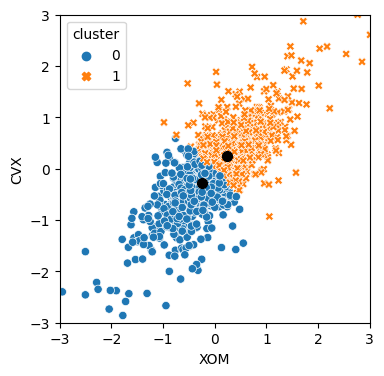

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='cluster', style='cluster',
 ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

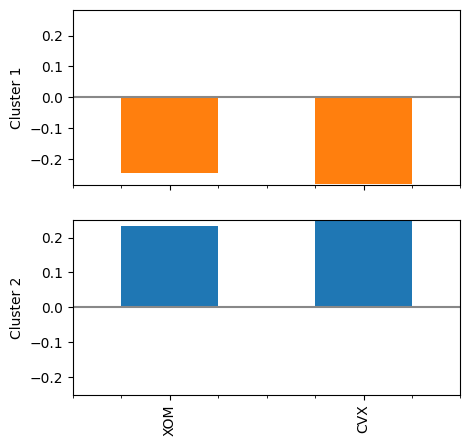

In [ ]:
import numpy as np
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
f, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True)#change the 2 to 4 for 4 clusters
for i, ax in enumerate(axes):
 center = centers.loc[i, :]
 maxPC = 1.01 * np.max(np.max(np.abs(center)))
 colors = ['C0' if l > 0 else 'C1' for l in center]
 ax.axhline(color='#888888')
 center.plot.bar(ax=ax, color=colors)
 ax.set_ylabel(f'Cluster {i + 1}')
 ax.set_ylim(-maxPC, maxPC)
#one cluster represents both going up, one represents both going down

Text(0, 0.5, 'Average Within-Cluster Squared Distances')

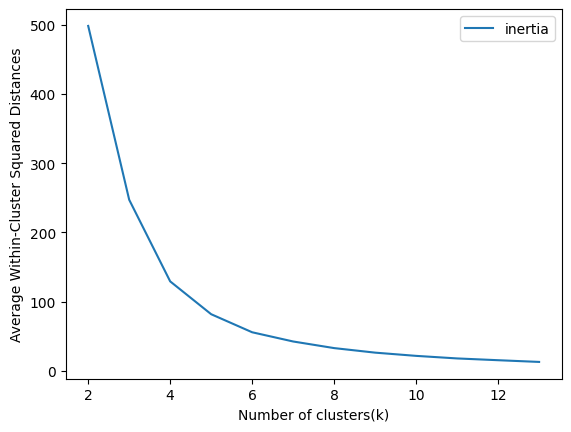

In [ ]:
inertia = []
for n_clusters in range(2, 14):
 kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
 inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')


In [ ]:
from scipy.cluster.hierarchy import linkage

syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD',
 'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = df.loc[df['Unnamed: 0'] >= '2011-01-01', syms1].transpose()
Z = linkage(df, method='complete')
Z
#cant understand anything right?
# The first value represents the index or label of the first merged cluster.
# The second value represents the index or label of the second merged cluster.
# The third value represents the distance or dissimilarity between the merged clusters.
# The fourth value represents the number of original data points contained in the merged cluster.

array([[ 14.        ,  15.        ,   8.59490731,   2.        ],
       [  5.        ,   9.        ,   8.70726095,   2.        ],
       [ 11.        ,  19.        ,  11.43861911,   3.        ],
       [ 18.        ,  20.        ,  13.54055199,   5.        ],
       [ 10.        ,  21.        ,  17.54262662,   6.        ],
       [ 13.        ,  16.        ,  18.30670621,   2.        ],
       [  3.        ,  17.        ,  18.96087019,   2.        ],
       [ 22.        ,  23.        ,  21.31534597,   8.        ],
       [  6.        ,  24.        ,  22.85872694,   3.        ],
       [  2.        ,  25.        ,  24.02785309,   9.        ],
       [  8.        ,  27.        ,  25.49676797,  10.        ],
       [  4.        ,  28.        ,  29.1889513 ,  11.        ],
       [ 12.        ,  26.        ,  31.15301738,   4.        ],
       [  0.        ,  29.        ,  38.98012839,  12.        ],
       [ 30.        ,  31.        ,  43.24155434,  16.        ],
       [  1.        ,  32

Text(0, 0.5, 'distance')

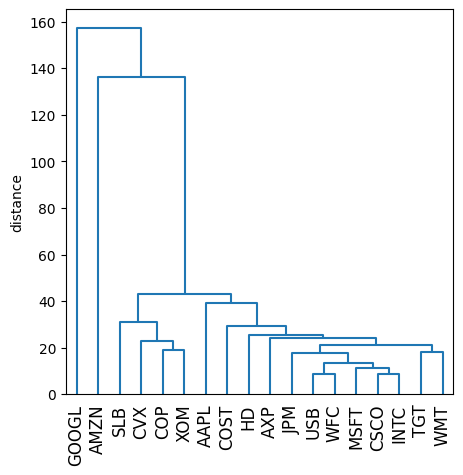

In [ ]:
from scipy.cluster.hierarchy import dendrogram
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=df.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [ ]:
from scipy.cluster.hierarchy import fcluster
memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
 print(f"{key} : {', '.join(item.index)}")

1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


In [ ]:
from sklearn.metrics import silhouette_score
for x in range(2,14):
  km = KMeans(n_clusters = x)
  km.fit(df)
  df['cluster_column'] = km.labels_
  silhouette_avg = silhouette_score(df.drop('cluster_column', axis=1), df['cluster_column'])
  df = df.drop('cluster_column', axis=1)
  print(f"Silhouette Score: {silhouette_avg}, No. of Clusters = {x}")

Silhouette Score: 0.5834469001696239, No. of Clusters = 2
Silhouette Score: 0.5116316289724545, No. of Clusters = 3
Silhouette Score: 0.5427949856722908, No. of Clusters = 4
Silhouette Score: 0.5401417522540799, No. of Clusters = 5
Silhouette Score: 0.5425917835040728, No. of Clusters = 6
Silhouette Score: 0.5345525645289237, No. of Clusters = 7
Silhouette Score: 0.5393730633910832, No. of Clusters = 8
Silhouette Score: 0.5336771558851476, No. of Clusters = 9
Silhouette Score: 0.5359652611900745, No. of Clusters = 10
Silhouette Score: 0.5384621740051093, No. of Clusters = 11
Silhouette Score: 0.5428360014911251, No. of Clusters = 12
Silhouette Score: 0.5455052029898905, No. of Clusters = 13


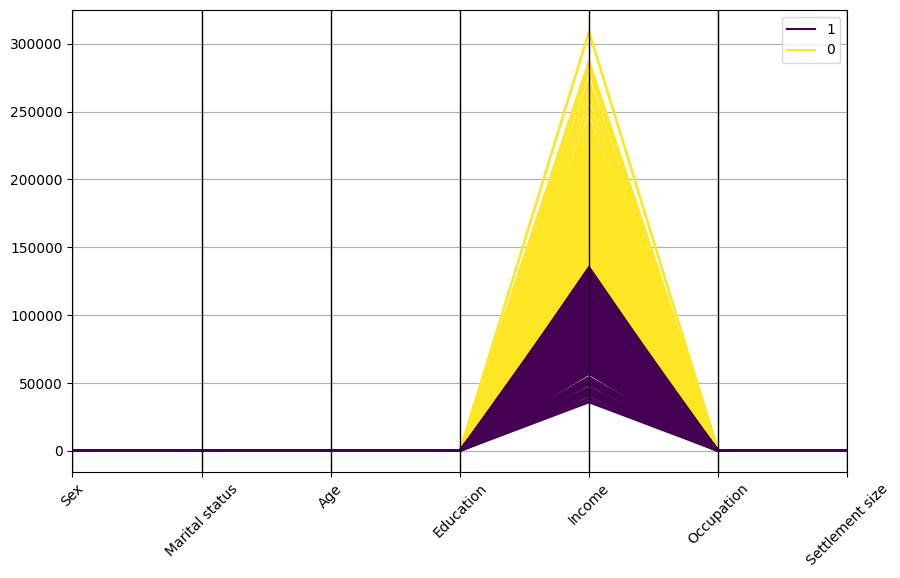

In [ ]:
from pandas.plotting import parallel_coordinates
km = KMeans(n_clusters = 2)
km.fit(df)
df['cluster_column'] = km.labels_

plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'cluster_column', colormap='viridis')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

# **First try to scale the data and then try to check silhouette score, does it increase, decrease, stay the same? and why? Then use the wine dataset and perform clustering on that**